## Week 2 Quiz

***

## Project Description

Use the Dognition_aggregated_by_DogID data set for the quiz questions. Note that we use comma (,) to separate groups of thousands in numbers. 

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|

## Summary

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime
from datetime import datetime, timedelta
import scipy.stats
import pandas_profiling
from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Folium library to plot values on a map.
import folium

# Use Feature-Engine library
#import feature_engine
#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.option_context('float_format','{:.2f}'.format)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
df = pd.read_csv("dognition_data_aggregated_by_dogid.csv",parse_dates=['Last_Active_At'])

In [3]:
df

,DogID,TotalTestsCompleted,MeanITIdays,MeanITIminutes,MedianITIdays,MedianITIminutes,Timediffdays,Timediffminutes,UserID,Gender,Birthday,Breed,Breed_Type,Breed_Group,Weight,Dog_Fixed,DNA_Tested,Dimension,Sign_in_Count,Max_Dogs,Membership_ID,Subscribed,City,State,Zip,Country,Exclude,Free_Start_User,Last_Active_At,Membership_Type
0,fd27b272-7144-11e5-ba71-058fbc01cf0b,21,28.201076,40609.54917,0.004687,6.749999931,564.021516,812190.983300,ce134e42-7144-11e5-ba71-058fbc01cf0b,female,2011.0,Labrador Retriever,Pure Breed,Sporting,50.0,1.0,0.0,charmer,14.0,2.0,2.0,1.0,Grand Forks,ND,58201,US,0,0,3/12/2015 0:25,2
1,fd27b5ba-7144-11e5-ba71-058fbc01cf0b,20,0.413307,595.1622807,0.005845,8.416666781,7.852836,11308.083330,ce1353d8-7144-11e5-ba71-058fbc01cf0b,male,2007.0,Shetland Sheepdog,Pure Breed,Herding,20.0,1.0,0.0,protodog,8.0,2.0,1.0,1.0,Barre,MA,1005,US,0,0,01/00/1900 12:00:00 AM,1
2,fd27b6b4-7144-11e5-ba71-058fbc01cf0b,2,0.009132,13.15000009,0.009132,13.15000009,0.009132,13.150000,ce135ab8-7144-11e5-ba71-058fbc01cf0b,male,2012.0,Golden Retriever,Pure Breed,Sporting,70.0,0.0,1.0,0,3.0,1.0,1.0,1.0,Darien,CT,6820,US,0,0,01/00/1900 12:00:00 AM,1
3,fd27b79a-7144-11e5-ba71-058fbc01cf0b,11,56.115179,80805.85833,0.004433,6.383333325,561.151794,808058.583300,ce13507c-7144-11e5-ba71-058fbc01cf0b,male,2011.0,Golden Retriever,Pure Breed,Sporting,70.0,0.0,0.0,0,21.0,1.0,1.0,1.0,Winnetka,IL,60093,US,0,0,9/12/2014 19:26,1
4,fd27b86c-7144-11e5-ba71-058fbc01cf0b,31,7.734254,11137.32611,0.000399,0.574999984,232.027627,334119.783300,ce135e14-7144-11e5-ba71-058fbc01cf0b,female,2010.0,Shih Tzu,Pure Breed,Toy,190.0,0.0,0.0,einstein,181.0,13.0,2.0,1.0,Raleigh,NC,27606,US,1,0,01/00/1900 12:00:00 AM,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17981,fdc235e0-7144-11e5-ba71-058fbc01cf0b,7,0.009408,13.54722222,0.004786,6.891666669,0.056447,81.283333,ce9b2aba-7144-11e5-ba71-058fbc01cf0b,male,2012.0,Chihuahua-Jack Russell Terrier Mix,Cross Breed,0,10.0,1.0,0.0,0,1.0,1.0,10.0,0.0,NaN,NaN,NaN,NaN,0,0,10/12/2015 14:44,1
17982,fdc23a68-7144-11e5-ba71-058fbc01cf0b,1,NaN,#VALUE!,NaN,#VALUE!,0.000000,0.000000,ce9b2eb6-7144-11e5-ba71-058fbc01cf0b,male,2014.0,Shetland Sheepdog,Pure Breed,Herding,10.0,0.0,0.0,0,1.0,1.0,9.0,0.0,NaN,NaN,NaN,NaN,0,1,10/12/2015 20:43,4
17983,fdc23ba8-7144-11e5-ba71-058fbc01cf0b,20,0.004957,7.137719299,0.004201,6.050000041,0.094178,135.616667,ce9b306e-7144-11e5-ba71-058fbc01cf0b,female,2008.0,Cockapoo,Popular Hybrid,0,10.0,1.0,0.0,charmer,1.0,1.0,10.0,1.0,Carolina Beach,NC,28428,US,0,0,10/12/2015 20:13,1
17984,fdc23e96-7144-11e5-ba71-058fbc01cf0b,4,0.002948,4.244444444,0.002778,4.000000102,0.008843,12.733333,ce9b33b6-7144-11e5-ba71-058fbc01cf0b,female,2011.0,Yorkshire Terrier,Pure Breed,Toy,0.0,1.0,0.0,0,1.0,1.0,9.0,0.0,NaN,NaN,NaN,NaN,0,1,10/12/2015 19:17,4


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17986 entries, 0 to 17985
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DogID                17986 non-null  object 
 1   TotalTestsCompleted  17986 non-null  int64  
 2   MeanITIdays          16718 non-null  float64
 3   MeanITIminutes       17986 non-null  object 
 4   MedianITIdays        16718 non-null  float64
 5   MedianITIminutes     17986 non-null  object 
 6   Timediffdays         17986 non-null  float64
 7   Timediffminutes      17986 non-null  float64
 8   UserID               17985 non-null  object 
 9   Gender               17985 non-null  object 
 10  Birthday             17985 non-null  float64
 11  Breed                17985 non-null  object 
 12  Breed_Type           17985 non-null  object 
 13  Breed_Group          17985 non-null  object 
 14  Weight               17985 non-null  float64
 15  Dog_Fixed            17985 non-null 

In [5]:
df.describe()

,TotalTestsCompleted,MeanITIdays,MedianITIdays,Timediffdays,Timediffminutes,Birthday,Weight,Dog_Fixed,DNA_Tested,Sign_in_Count,Max_Dogs,Membership_ID,Subscribed
count,17986.000000,1.671800e+04,16718.000000,17986.000000,1.798600e+04,17985.000000,17985.000000,17985.000000,17985.000000,17985.000000,17985.000000,17985.000000,17985.000000
mean,9.807239,2.300726e+00,0.275986,25.140728,3.620265e+04,2009.932388,41.485683,0.850876,0.036697,8.329386,1.273450,7.411565,0.549124
std,7.799484,1.011768e+01,7.182127,75.788752,1.091358e+05,3.341993,29.380373,0.356221,0.188023,68.940494,1.466773,3.938681,0.497595
min,1.000000,6.090000e-07,0.000000,0.000000,0.000000e+00,1982.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,3.719136e-03,0.002998,0.009343,1.345417e+01,2008.000000,20.000000,1.000000,0.000000,2.000000,1.000000,2.000000,0.000000
50%,7.000000,1.466368e-01,0.003895,0.724473,1.043242e+03,2011.000000,40.000000,1.000000,0.000000,3.000000,1.000000,10.000000,1.000000
75%,16.000000,1.226744e+00,0.005012,11.890451,1.712225e+04,2012.000000,60.000000,1.000000,0.000000,6.000000,1.000000,10.000000,1.000000
max,45.000000,6.509563e+02,650.956262,960.560440,1.383207e+06,2015.000000,190.000000,1.000000,1.000000,1695.000000,36.000000,17.000000,1.000000


In [6]:
df.columns

Index(['DogID', 'TotalTestsCompleted', 'MeanITIdays', 'MeanITIminutes', 'MedianITIdays', 'MedianITIminutes', 'Timediffdays', 'Timediffminutes', 'UserID', 'Gender', 'Birthday', 'Breed', 'Breed_Type', 'Breed_Group', 'Weight', 'Dog_Fixed', 'DNA_Tested', 'Dimension', 'Sign_in_Count', 'Max_Dogs', 'Membership_ID', 'Subscribed', 'City', 'State', 'Zip', 'Country', 'Exclude', 'Free_Start_User', 'Last_Active_At', 'Membership_Type'], dtype='object')

How many unique human user IDs are there in the Dognition_aggregated_by_DogID data set?

In [7]:
df["UserID"].nunique()

16261

In [8]:
df["State"].unique()

array(['ND', 'MA', 'CT', 'IL', 'NC', 'WA', 'CO', 'CA', 'OH', 'VA', 'NY',
       'WY', 'A', 'AZ', 'NJ', 'AE', 'PA', '83', '1', 'DC', 'FL', 'TX',
       'NM', 'KS', 'OR', 'MO', 'MD', 'GA', 'LA', 'NV', 'LND', 'NH', 'BC',
       'HI', 'MN', 'JM', 'ZH', 'TN', 'F', 'QLD', 'JU', 'IA', 'IN', 'WI',
       'N', 'VIC', 'ON', 'MI', 'SC', nan, 'OK', 'AB', 'AL', '84', 'RI',
       'UT', 'AP', 'NSW', 'WLN', 'B', 'VT', 'L', 'NLE', '37', 'NW', 'ID',
       'KY', 'TAS', 'EDH', 'KEN', 'MB', 'QC', 'NE', '2', 'AR', 'BB',
       'GBN', '3', 'UKM', '78', 'RJ', 'PR', 'CAM', 'C', 'SOM', 'R', 'VL',
       'LIN', 'ME', 'DIF', '0', 'AK', 'D', 'BY', '88', 'RM', '75', 'MT',
       'GE', '21', 'J', 'WSX', 'GU', 'HH', 'DE', '6', 'BNE', '45', 'TM',
       'S', '62', '10', '5', '4', 'NL', 'SP', 'SD', 'ACT', '8', 'NB',
       'HE', 'SRY', '12', 'ES', 'NS', 'MS', 'ESX', 'MDB', 'WV', 'SLK',
       '42', '25', 'AG', 'SK', 'SRP', 'ENG', 'HID', 'NT', 'GL', 'HIL',
       'ABD', 'NBL', 'NWP', 'MAN', '34', 'M', '65', 'LDS', '82

In [9]:
df[df["State"]=='37']

,DogID,TotalTestsCompleted,MeanITIdays,MeanITIminutes,MedianITIdays,MedianITIminutes,Timediffdays,Timediffminutes,UserID,Gender,Birthday,Breed,Breed_Type,Breed_Group,Weight,Dog_Fixed,DNA_Tested,Dimension,Sign_in_Count,Max_Dogs,Membership_ID,Subscribed,City,State,Zip,Country,Exclude,Free_Start_User,Last_Active_At,Membership_Type
398,fd40fa66-7144-11e5-ba71-058fbc01cf0b,20,0.011260,16.21403508,0.006331,9.116666671,0.213935,308.066667,ce137bce-7144-11e5-ba71-058fbc01cf0b,female,2011.0,Dachshund,Pure Breed,Hound,0.0,0.0,0.0,renaissance-dog,14.0,1.0,1.0,1.0,Tallinn,37,10912,EE,0,0,06/27/2014 02:45:00 PM,1
5399,fd674df6-7144-11e5-ba71-058fbc01cf0b,31,8.002653,11523.82,0.004028,5.800000057,240.079583,345714.600000,ce415c56-7144-11e5-ba71-058fbc01cf0b,male,2011.0,Miniature Schnauzer,Pure Breed,Terrier,10.0,0.0,0.0,expert,13.0,1.0,3.0,1.0,Tallinn,37,13519,EE,0,1,8/3/2015 5:50,3
11208,fd7c19fc-7144-11e5-ba71-058fbc01cf0b,2,0.002708,3.899999967,0.002708,3.899999967,0.002708,3.900000,ce7b84b2-7144-11e5-ba71-058fbc01cf0b,female,2015.0,St. Bernard,Pure Breed,0,40.0,0.0,0.0,0,1.0,1.0,10.0,1.0,Tallinn,37,13516,EE,0,0,5/9/2015 8:02,1
15678,fdb61558-7144-11e5-ba71-058fbc01cf0b,14,2.751638,3962.358974,0.390069,561.7,35.771296,51510.666670,ce917880-7144-11e5-ba71-058fbc01cf0b,female,2012.0,Mixed,Mixed Breed/ Other/ I Don't Know,0,50.0,1.0,0.0,0,6.0,1.0,10.0,0.0,Harju County,37,76311,EE,0,1,09/24/2015 06:15:00 PM,1
15721,fdb64e7e-7144-11e5-ba71-058fbc01cf0b,20,0.367163,528.7140351,0.004144,5.966666654,6.976088,10045.566670,ce91a206-7144-11e5-ba71-058fbc01cf0b,male,2011.0,Labrador Retriever,Pure Breed,Sporting,10.0,1.0,0.0,charmer,9.0,1.0,10.0,1.0,Viimsi Vald,37,74017,EE,0,0,08/17/2015 07:15:00 PM,1
15724,fdb653ba-7144-11e5-ba71-058fbc01cf0b,7,2.514662,3621.113889,0.011036,15.89166664,15.087975,21726.683330,ce91a4ae-7144-11e5-ba71-058fbc01cf0b,female,2014.0,Australian Shepherd,Pure Breed,Herding,30.0,0.0,0.0,0,7.0,2.0,10.0,0.0,Tallinn,37,12112,EE,0,1,09/22/2015 01:42:00 PM,1
15737,fdb67228-7144-11e5-ba71-058fbc01cf0b,7,5.146622,7411.136111,0.009502,13.68333338,30.879734,44466.816670,ce91bb10-7144-11e5-ba71-058fbc01cf0b,female,2012.0,Mixed,Mixed Breed/ Other/ I Don't Know,0,40.0,1.0,0.0,0,4.0,1.0,10.0,1.0,Tallinn,37,10614,EE,0,0,09/13/2015 04:35:00 PM,1
15996,fdb7e716-7144-11e5-ba71-058fbc01cf0b,20,0.472172,679.927193,0.006227,8.966666646,8.971262,12918.616670,ce930b14-7144-11e5-ba71-058fbc01cf0b,female,2013.0,Golden Retriever,Pure Breed,Sporting,50.0,0.0,0.0,socialite,3.0,1.0,10.0,0.0,Tallinn,37,10129,EE,0,0,9/7/2015 18:17,1
16090,fdb84d78-7144-11e5-ba71-058fbc01cf0b,7,0.952029,1370.922222,0.010451,15.05000001,5.712176,8225.533333,ce9372ac-7144-11e5-ba71-058fbc01cf0b,male,2015.0,Pembroke Welsh Corgi,Pure Breed,Herding,20.0,0.0,0.0,0,9.0,1.0,10.0,1.0,Tallinn,37,11912,EE,0,0,9/6/2015 12:40,1
16132,fdb893be-7144-11e5-ba71-058fbc01cf0b,20,0.003333,4.799122813,0.002894,4.166666699,0.063322,91.183333,ce93bd48-7144-11e5-ba71-058fbc01cf0b,male,2014.0,Siberian Husky,Pure Breed,Working,60.0,0.0,0.0,socialite,1.0,2.0,10.0,0.0,Tartu,37,50410,EE,0,0,9/1/2015 15:05,1


What property is common to almost all the data points that had “Sign In Counts” of greater than 175 in the Dognition_aggregated_by_DogID data set?

In [10]:
df[df["Sign_in_Count"] > 175]

,DogID,TotalTestsCompleted,MeanITIdays,MeanITIminutes,MedianITIdays,MedianITIminutes,Timediffdays,Timediffminutes,UserID,Gender,Birthday,Breed,Breed_Type,Breed_Group,Weight,Dog_Fixed,DNA_Tested,Dimension,Sign_in_Count,Max_Dogs,Membership_ID,Subscribed,City,State,Zip,Country,Exclude,Free_Start_User,Last_Active_At,Membership_Type
4,fd27b86c-7144-11e5-ba71-058fbc01cf0b,31,7.734254,11137.32611,0.000399,0.574999984,232.027627,3.341198e+05,ce135e14-7144-11e5-ba71-058fbc01cf0b,female,2010.0,Shih Tzu,Pure Breed,Toy,190.0,0.0,0.0,einstein,181.0,13.0,2.0,1.0,Raleigh,NC,27606,US,1,0,01/00/1900 12:00:00 AM,2
6,fd27ba1a-7144-11e5-ba71-058fbc01cf0b,27,6.190590,8914.449359,0.000336,0.483333223,160.955336,2.317757e+05,ce135e14-7144-11e5-ba71-058fbc01cf0b,male,1982.0,Shih Tzu,Pure Breed,Toy,190.0,1.0,0.0,maverick,181.0,13.0,2.0,1.0,Raleigh,NC,27606,US,1,0,01/00/1900 12:00:00 AM,2
43,fd27e9a4-7144-11e5-ba71-058fbc01cf0b,22,5.530556,7964.000794,0.000382,0.550000037,116.141678,1.672440e+05,ce135e14-7144-11e5-ba71-058fbc01cf0b,male,2012.0,Shih Tzu,Pure Breed,Toy,190.0,0.0,1.0,protodog,181.0,13.0,2.0,1.0,Raleigh,NC,27606,US,1,0,01/00/1900 12:00:00 AM,2
45,fd27ed46-7144-11e5-ba71-058fbc01cf0b,25,4.325326,6228.46875,0.000666,0.958333333,103.807812,1.494832e+05,ce135e14-7144-11e5-ba71-058fbc01cf0b,female,2012.0,Shih Tzu,Pure Breed,Toy,190.0,0.0,0.0,maverick,181.0,13.0,2.0,1.0,Raleigh,NC,27606,US,1,0,01/00/1900 12:00:00 AM,2
61,fd3ccf2c-7144-11e5-ba71-058fbc01cf0b,22,13.520467,19469.47302,0.008171,11.76666672,283.929815,4.088589e+05,ce135766-7144-11e5-ba71-058fbc01cf0b,female,2008.0,Shih Tzu,Pure Breed,Toy,190.0,1.0,0.0,einstein,355.0,7.0,2.0,1.0,Cary,NC,27519,US,0,0,05/13/2015 02:44:00 PM,2
69,fd3cf718-7144-11e5-ba71-058fbc01cf0b,17,1.256122,1808.815625,0.000637,0.916666642,20.097951,2.894105e+04,ce135e14-7144-11e5-ba71-058fbc01cf0b,female,2012.0,Shih Tzu,Pure Breed,Toy,190.0,1.0,1.0,0,181.0,13.0,2.0,1.0,Raleigh,NC,27606,US,1,0,01/00/1900 12:00:00 AM,2
109,fd3d1b44-7144-11e5-ba71-058fbc01cf0b,20,3.055452,4399.850877,0.000590,0.849999919,58.053588,8.359717e+04,ce134a78-7144-11e5-ba71-058fbc01cf0b,male,2009.0,Shih Tzu,Pure Breed,Toy,190.0,1.0,0.0,einstein,310.0,3.0,2.0,1.0,Durham,NC,27701,US,1,0,02/23/2015 01:39:00 PM,2
174,fd3d587a-7144-11e5-ba71-058fbc01cf0b,22,1.864325,2684.628571,0.000556,0.80000002,39.150833,5.637720e+04,ce135e14-7144-11e5-ba71-058fbc01cf0b,male,2011.0,Shih Tzu,Pure Breed,Toy,190.0,1.0,1.0,stargazer,181.0,13.0,2.0,1.0,Raleigh,NC,27606,US,1,0,01/00/1900 12:00:00 AM,2
195,fd3fbfe8-7144-11e5-ba71-058fbc01cf0b,4,0.340228,489.9277777,0.001887,2.716666512,1.020683,1.469783e+03,ce135e14-7144-11e5-ba71-058fbc01cf0b,female,2012.0,Shih Tzu,Pure Breed,Toy,190.0,1.0,1.0,0,181.0,13.0,2.0,1.0,Raleigh,NC,27606,US,1,0,01/00/1900 12:00:00 AM,2
205,fd3fd140-7144-11e5-ba71-058fbc01cf0b,1,NaN,#VALUE!,NaN,#VALUE!,0.000000,0.000000e+00,ce135766-7144-11e5-ba71-058fbc01cf0b,male,2012.0,Shih Tzu,Pure Breed,Toy,190.0,1.0,1.0,0,355.0,7.0,2.0,1.0,Cary,NC,27519,US,0,0,05/13/2015 02:44:00 PM,2


The Personality Dimension that has the highest average number of completed tests in the Dognition_aggregated_by_DogID data set is clearly:

In [11]:
df.groupby("Dimension")['TotalTestsCompleted'].mean().sort_values()

Dimension
0                   6.227207
stargazer          21.229917
maverick           21.287823
renaissance-dog    21.415686
socialite          21.436280
expert             21.560403
charmer            21.571014
einstein           21.635659
protodog           21.724252
ace                21.767296
Name: TotalTestsCompleted, dtype: float64

In the Dognition_aggregated_by_DogID data set, what is consistent about the relationship between breeding group and number of tests completed, regardless of whether you aggregate the variable representing the number of tests completed by the median or the average of the breeding group?

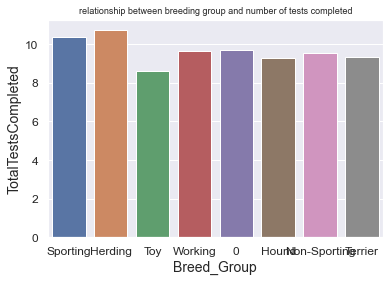

In [12]:
plt.title("relationship between breeding group and number of tests completed")
sns.barplot(x=df.Breed_Group, y=df.TotalTestsCompleted, data=df, ci=None)
plt.show()

In the Dognition_aggregated_by_DogID data set, what personality type has the strongest representation (greatest number of records) in the sporting breed group?

In [13]:
sporting = df[df["Breed_Group"] == "Sporting"]

In [14]:
sporting

,DogID,TotalTestsCompleted,MeanITIdays,MeanITIminutes,MedianITIdays,MedianITIminutes,Timediffdays,Timediffminutes,UserID,Gender,Birthday,Breed,Breed_Type,Breed_Group,Weight,Dog_Fixed,DNA_Tested,Dimension,Sign_in_Count,Max_Dogs,Membership_ID,Subscribed,City,State,Zip,Country,Exclude,Free_Start_User,Last_Active_At,Membership_Type
0,fd27b272-7144-11e5-ba71-058fbc01cf0b,21,28.201076,40609.54917,0.004687,6.749999931,564.021516,812190.983300,ce134e42-7144-11e5-ba71-058fbc01cf0b,female,2011.0,Labrador Retriever,Pure Breed,Sporting,50.0,1.0,0.0,charmer,14.0,2.0,2.0,1.0,Grand Forks,ND,58201,US,0,0,3/12/2015 0:25,2
2,fd27b6b4-7144-11e5-ba71-058fbc01cf0b,2,0.009132,13.15000009,0.009132,13.15000009,0.009132,13.150000,ce135ab8-7144-11e5-ba71-058fbc01cf0b,male,2012.0,Golden Retriever,Pure Breed,Sporting,70.0,0.0,1.0,0,3.0,1.0,1.0,1.0,Darien,CT,6820,US,0,0,01/00/1900 12:00:00 AM,1
3,fd27b79a-7144-11e5-ba71-058fbc01cf0b,11,56.115179,80805.85833,0.004433,6.383333325,561.151794,808058.583300,ce13507c-7144-11e5-ba71-058fbc01cf0b,male,2011.0,Golden Retriever,Pure Breed,Sporting,70.0,0.0,0.0,0,21.0,1.0,1.0,1.0,Winnetka,IL,60093,US,0,0,9/12/2014 19:26,1
8,fd27c1c2-7144-11e5-ba71-058fbc01cf0b,20,0.684105,985.1105263,0.003380,4.866666585,12.997986,18717.100000,ce136a1c-7144-11e5-ba71-058fbc01cf0b,male,2008.0,Labrador Retriever,Pure Breed,Sporting,70.0,1.0,0.0,einstein,13.0,1.0,1.0,1.0,Seattle,WA,98117,US,0,0,01/00/1900 12:00:00 AM,1
11,fd27c7d0-7144-11e5-ba71-058fbc01cf0b,20,0.005378,7.743859644,0.004479,6.450000053,0.102176,147.133333,ce136e36-7144-11e5-ba71-058fbc01cf0b,male,2011.0,Vizsla,Pure Breed,Sporting,60.0,1.0,0.0,socialite,10.0,1.0,2.0,0.0,Aptos,CA,95003,US,0,0,01/00/1900 12:00:00 AM,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17932,fdc1e63a-7144-11e5-ba71-058fbc01cf0b,7,0.006686,9.627777776,0.004838,6.9666666,0.040116,57.766667,ce9a4744-7144-11e5-ba71-058fbc01cf0b,male,2015.0,Cocker Spaniel,Pure Breed,Sporting,10.0,1.0,0.0,0,1.0,1.0,10.0,0.0,NaN,NaN,NaN,NaN,0,0,10/12/2015 2:13,1
17934,fdc1e766-7144-11e5-ba71-058fbc01cf0b,20,0.138347,199.2201754,0.005764,8.299999906,2.628600,3785.183333,ce9adeca-7144-11e5-ba71-058fbc01cf0b,male,2007.0,Weimaraner,Pure Breed,Sporting,60.0,1.0,0.0,socialite,1.0,1.0,10.0,0.0,Oviedo,FL,32765,US,0,0,10/12/2015 2:56,1
17953,fdc1fe40-7144-11e5-ba71-058fbc01cf0b,4,0.004047,5.82777774,0.004664,6.716666614,0.012141,17.483333,ce9af144-7144-11e5-ba71-058fbc01cf0b,male,2009.0,Golden Retriever,Pure Breed,Sporting,140.0,1.0,0.0,0,1.0,1.0,9.0,0.0,NaN,NaN,NaN,NaN,0,1,10/10/2015 22:03,4
17961,fdc20336-7144-11e5-ba71-058fbc01cf0b,9,0.004142,5.964583314,0.003912,5.633333372,0.033137,47.716667,ce9af95a-7144-11e5-ba71-058fbc01cf0b,male,2013.0,Golden Retriever,Pure Breed,Sporting,80.0,1.0,0.0,0,1.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,0,0,10/11/2015 2:01,2


In [15]:
sporting["Dimension"].value_counts()

0                  1908
socialite           195
charmer             128
protodog             92
ace                  73
renaissance-dog      67
stargazer            48
expert               42
maverick             20
einstein             14
Name: Dimension, dtype: int64

In the Dognition_aggregated_by_DogID data set, which of the following describes the median number of tests dogs of different breed types complete?

In [16]:
df.groupby("Breed_Type")['TotalTestsCompleted'].median()

Breed_Type
Cross Breed                         7
Mixed Breed/ Other/ I Don't Know    7
Popular Hybrid                      7
Pure Breed                          7
Name: TotalTestsCompleted, dtype: int64

In the Dognition_aggregated_by_DogID data set, how do the average number of tests dogs complete compare for fixed vs. not fixed dogs across different breed types? 

In [17]:
df["Dog_Fixed"].value_counts()

1.0    15303
0.0     2682
Name: Dog_Fixed, dtype: int64

In [18]:
df.groupby("Dog_Fixed")["TotalTestsCompleted"].mean()

Dog_Fixed
0.0    8.854959
1.0    9.973469
Name: TotalTestsCompleted, dtype: float64

In [19]:
pivottable1 = pd.pivot_table(data=df, values="TotalTestsCompleted", index="Dog_Fixed", columns="Breed_Type", aggfunc='mean')

In [20]:
pivottable1

Breed_Type,Cross Breed,Mixed Breed/ Other/ I Don't Know,Popular Hybrid,Pure Breed
Dog_Fixed,,,,
0.0,9.594366,7.146667,8.947368,8.979498
1.0,9.993514,9.695467,10.426871,10.106964


In the Dognition_aggregated_by_DogID data set, which of the following are true about the average number of tests dogs complete when comparing DNA vs. not DNA-tested dogs who were fixed vs. not fixed across different breed types?  Click all that apply. 

In [21]:
pivottable2 = pd.pivot_table(data=df, values="TotalTestsCompleted", index="DNA_Tested", columns="Breed_Type", aggfunc='mean')

In [22]:
pivottable2

Breed_Type,Cross Breed,Mixed Breed/ Other/ I Don't Know,Popular Hybrid,Pure Breed
DNA_Tested,,,,
0.0,9.789085,9.469576,10.265554,9.843377
1.0,13.220588,11.034335,9.200000,10.765734


In [23]:
pivottable3 = pd.pivot_table(data=df, values="TotalTestsCompleted", index=["DNA_Tested","Breed"], columns="Breed_Type", aggfunc='mean')

In [24]:
pivottable3

Breed_Type                                     Cross Breed  Mixed Breed/ Other/ I Don't Know  Popular Hybrid  Pure Breed
DNA_Tested Breed                                                                                                        
0.0        #NAME?                                14.272727                               NaN             NaN         NaN
           Affenpinscher                               NaN                               NaN             NaN   14.000000
           Affenpinscher-Brussels Griffon Mix    20.000000                               NaN             NaN         NaN
           Afghan Hound                                NaN                               NaN             NaN    8.333333
           Afghan Hound-Akita Mix                 3.000000                               NaN             NaN         NaN
...                                                    ...                               ...             ...         ...
1.0        Yorkshire Terrier                           NaN                               NaN             NaN    4.000000
           Yorkshire Terrier- Mix                18.000000                               NaN             NaN         NaN
           Yorkshire Terrier-Bichon Frise Mix     1.000000                               NaN             NaN         NaN
           Yorkshire Terrier-Poodle Mix           4.000000                               NaN             NaN         NaN
           Yorkshire Terrier-Shih Tzu Mix        20.000000                               NaN             NaN         NaN

[1456 rows x 4 columns]

In the Dognition_aggregated_by_DogID data set, when you make a filled map that displays the number of unique Dog IDs in each country, there is country in Africa that has a deep color, suggesting it has a lot of users.  When you hover over that country, what Country is displayed on the tool tip?

In [25]:
df["Country"].unique()

array(['US', 'FR', 'DK', 'SG', 'GB', 'CA', 'IL', 'CH', 'AU', 'NZ', 'HK',
       nan, 'GR', 'IE', 'MX', 'EE', 'DE', 'NO', 'AT', 'BR', 'LT', 'PH',
       'IT', 'CL', 'GU', 'RO', 'SA', 'NL', 'FI', 'BA', 'AR', 'ES', 'SE',
       'VE', 'BE', 'BS', 'ZA', 'HU', 'BM', 'IM', 'GL', 'IN', 'PL', 'KY',
       'BG', 'CN', 'DO', 'PT', 'CW', 'CO', 'CR', 'CZ', 'PR', 'LV', 'AE',
       'TR', 'ME', 'PE', 'KZ', 'SI', 'UA', 'NI', 'RU', 'TT', 'HR', 'JP',
       'LA', 'AD', 'IS'], dtype=object)

In [26]:
df.groupby("Country")['DogID'].count().sort_values(ascending=False)

Country
US    10310
CA      551
AU      169
GB      158
NZ       45
      ...  
SA        1
DO        1
LV        1
HR        1
ME        1
Name: DogID, Length: 68, dtype: int64

In the Dognition_aggregated_by_DogID data set, which state within the United States has the most Dognition customers?

In [27]:
usa = df[df["Country"] == "US"]

In [28]:
usa.head()

,DogID,TotalTestsCompleted,MeanITIdays,MeanITIminutes,MedianITIdays,MedianITIminutes,Timediffdays,Timediffminutes,UserID,Gender,Birthday,Breed,Breed_Type,Breed_Group,Weight,Dog_Fixed,DNA_Tested,Dimension,Sign_in_Count,Max_Dogs,Membership_ID,Subscribed,City,State,Zip,Country,Exclude,Free_Start_User,Last_Active_At,Membership_Type
0,fd27b272-7144-11e5-ba71-058fbc01cf0b,21,28.201076,40609.54917,0.004687,6.749999931,564.021516,812190.98330,ce134e42-7144-11e5-ba71-058fbc01cf0b,female,2011.0,Labrador Retriever,Pure Breed,Sporting,50.0,1.0,0.0,charmer,14.0,2.0,2.0,1.0,Grand Forks,ND,58201,US,0,0,3/12/2015 0:25,2
1,fd27b5ba-7144-11e5-ba71-058fbc01cf0b,20,0.413307,595.1622807,0.005845,8.416666781,7.852836,11308.08333,ce1353d8-7144-11e5-ba71-058fbc01cf0b,male,2007.0,Shetland Sheepdog,Pure Breed,Herding,20.0,1.0,0.0,protodog,8.0,2.0,1.0,1.0,Barre,MA,1005,US,0,0,01/00/1900 12:00:00 AM,1
2,fd27b6b4-7144-11e5-ba71-058fbc01cf0b,2,0.009132,13.15000009,0.009132,13.15000009,0.009132,13.15000,ce135ab8-7144-11e5-ba71-058fbc01cf0b,male,2012.0,Golden Retriever,Pure Breed,Sporting,70.0,0.0,1.0,0,3.0,1.0,1.0,1.0,Darien,CT,6820,US,0,0,01/00/1900 12:00:00 AM,1
3,fd27b79a-7144-11e5-ba71-058fbc01cf0b,11,56.115179,80805.85833,0.004433,6.383333325,561.151794,808058.58330,ce13507c-7144-11e5-ba71-058fbc01cf0b,male,2011.0,Golden Retriever,Pure Breed,Sporting,70.0,0.0,0.0,0,21.0,1.0,1.0,1.0,Winnetka,IL,60093,US,0,0,9/12/2014 19:26,1
4,fd27b86c-7144-11e5-ba71-058fbc01cf0b,31,7.734254,11137.32611,0.000399,0.574999984,232.027627,334119.78330,ce135e14-7144-11e5-ba71-058fbc01cf0b,female,2010.0,Shih Tzu,Pure Breed,Toy,190.0,0.0,0.0,einstein,181.0,13.0,2.0,1.0,Raleigh,NC,27606,US,1,0,01/00/1900 12:00:00 AM,2


In [29]:
usa.State.value_counts()

CA    1548
NY     696
NC     637
TX     625
FL     574
VA     432
PA     371
IL     361
WA     341
CO     323
MA     303
OH     294
NJ     271
MD     262
GA     251
AZ     242
MI     238
CT     190
OR     173
MN     161
TN     150
SC     144
WI     142
MO     112
IN     109
OK      91
DC      89
NV      75
KS      73
NM      69
KY      66
IA      63
LA      63
NH      61
UT      58
ID      51
HI      50
AL      49
DE      46
ME      44
NE      39
AR      39
VT      37
RI      37
MT      36
AK      26
MS      22
WV      21
WY      14
SD       9
ND       8
AE       7
AP       6
PR       5
GU       1
Name: State, dtype: int64

In the Dognition_aggregated_by_DogID data set, dogs in which of the following states did customers complete a median number of tests that was greater than 13? 

In [30]:
usa.groupby("State")["TotalTestsCompleted"].median()

State
AE     7.0
AK    15.0
AL     8.0
AP    13.5
AR    11.0
AZ    13.0
CA     9.0
CO    11.0
CT     8.5
DC    10.0
DE    12.5
FL    11.0
GA    11.0
GU    20.0
HI    11.0
IA    15.0
ID     7.0
IL    11.0
IN    11.0
KS    11.0
KY    11.0
LA     7.0
MA    11.0
MD     7.0
ME    18.0
MI    11.0
MN    11.0
MO    11.0
MS     5.5
MT    11.0
NC    14.0
ND    19.5
NE    11.0
NH     7.0
NJ     7.0
NM    11.0
NV    11.0
NY     7.0
OH    10.5
OK     9.0
OR    11.0
PA    11.0
PR     6.0
RI     7.0
SC    11.0
SD    20.0
TN     7.0
TX     9.0
UT    11.0
VA    13.0
VT    11.0
WA    11.0
WI    11.0
WV     5.0
WY    15.0
Name: TotalTestsCompleted, dtype: float64

In [31]:
mediantests = usa.groupby("State")["TotalTestsCompleted"].median()
mediantests

State
AE     7.0
AK    15.0
AL     8.0
AP    13.5
AR    11.0
AZ    13.0
CA     9.0
CO    11.0
CT     8.5
DC    10.0
DE    12.5
FL    11.0
GA    11.0
GU    20.0
HI    11.0
IA    15.0
ID     7.0
IL    11.0
IN    11.0
KS    11.0
KY    11.0
LA     7.0
MA    11.0
MD     7.0
ME    18.0
MI    11.0
MN    11.0
MO    11.0
MS     5.5
MT    11.0
NC    14.0
ND    19.5
NE    11.0
NH     7.0
NJ     7.0
NM    11.0
NV    11.0
NY     7.0
OH    10.5
OK     9.0
OR    11.0
PA    11.0
PR     6.0
RI     7.0
SC    11.0
SD    20.0
TN     7.0
TX     9.0
UT    11.0
VA    13.0
VT    11.0
WA    11.0
WI    11.0
WV     5.0
WY    15.0
Name: TotalTestsCompleted, dtype: float64

In [32]:
mediantests[mediantests>13.0]

State
AK    15.0
AP    13.5
GU    20.0
IA    15.0
ME    18.0
NC    14.0
ND    19.5
SD    20.0
WY    15.0
Name: TotalTestsCompleted, dtype: float64

In the Dognition_aggregated_by_DogID data set, when looking at only dogs who completed 19 or less tests, which of the following is true about the relationship between inter-test intervals (ITIs) and number of tests completed?  Click all that apply

In [33]:
dogsub19 = df[df["TotalTestsCompleted"] <= 19]

In [34]:
dogsub19

,DogID,TotalTestsCompleted,MeanITIdays,MeanITIminutes,MedianITIdays,MedianITIminutes,Timediffdays,Timediffminutes,UserID,Gender,Birthday,Breed,Breed_Type,Breed_Group,Weight,Dog_Fixed,DNA_Tested,Dimension,Sign_in_Count,Max_Dogs,Membership_ID,Subscribed,City,State,Zip,Country,Exclude,Free_Start_User,Last_Active_At,Membership_Type
2,fd27b6b4-7144-11e5-ba71-058fbc01cf0b,2,0.009132,13.15000009,0.009132,13.15000009,0.009132,13.150000,ce135ab8-7144-11e5-ba71-058fbc01cf0b,male,2012.0,Golden Retriever,Pure Breed,Sporting,70.0,0.0,1.0,0,3.0,1.0,1.0,1.0,Darien,CT,6820,US,0,0,01/00/1900 12:00:00 AM,1
3,fd27b79a-7144-11e5-ba71-058fbc01cf0b,11,56.115179,80805.85833,0.004433,6.383333325,561.151794,808058.583300,ce13507c-7144-11e5-ba71-058fbc01cf0b,male,2011.0,Golden Retriever,Pure Breed,Sporting,70.0,0.0,0.0,0,21.0,1.0,1.0,1.0,Winnetka,IL,60093,US,0,0,9/12/2014 19:26,1
10,fd27c74e-7144-11e5-ba71-058fbc01cf0b,14,25.696194,37002.51923,0.005845,8.41666661,334.050521,481032.750000,ce136c24-7144-11e5-ba71-058fbc01cf0b,female,2011.0,German Shepherd Dog-Pembroke Welsh Corgi Mix,Cross Breed,0,40.0,1.0,0.0,0,7.0,2.0,2.0,1.0,Bremerton,WA,98311,US,0,0,01/00/1900 12:00:00 AM,2
14,fd27c956-7144-11e5-ba71-058fbc01cf0b,11,2.824800,4067.711667,0.003773,5.433333285,28.247998,40677.116670,ce134be0-7144-11e5-ba71-058fbc01cf0b,male,2010.0,German Shepherd Dog-Nova Scotia Duck Tolling R...,Cross Breed,0,30.0,1.0,0.0,0,65.0,3.0,2.0,1.0,Hillsborough,NC,27278,US,0,0,01/00/1900 12:00:00 AM,2
17,fd27ce1a-7144-11e5-ba71-058fbc01cf0b,7,0.002816,4.055555575,0.002946,4.241666624,0.016898,24.333333,ce136f94-7144-11e5-ba71-058fbc01cf0b,male,2000.0,Beagle,Pure Breed,Hound,20.0,1.0,1.0,0,27.0,4.0,2.0,1.0,Charlottesville,VA,22903,US,0,0,04/13/2014 01:46:00 PM,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17980,fdc228de-7144-11e5-ba71-058fbc01cf0b,9,0.015709,22.62083333,0.003860,5.558333362,0.125671,180.966667,ce9b202e-7144-11e5-ba71-058fbc01cf0b,female,2010.0,Labrador Retriever,Pure Breed,Sporting,60.0,1.0,0.0,0,1.0,1.0,10.0,0.0,NaN,NaN,NaN,NaN,0,0,10/12/2015 2:48,1
17981,fdc235e0-7144-11e5-ba71-058fbc01cf0b,7,0.009408,13.54722222,0.004786,6.891666669,0.056447,81.283333,ce9b2aba-7144-11e5-ba71-058fbc01cf0b,male,2012.0,Chihuahua-Jack Russell Terrier Mix,Cross Breed,0,10.0,1.0,0.0,0,1.0,1.0,10.0,0.0,NaN,NaN,NaN,NaN,0,0,10/12/2015 14:44,1
17982,fdc23a68-7144-11e5-ba71-058fbc01cf0b,1,NaN,#VALUE!,NaN,#VALUE!,0.000000,0.000000,ce9b2eb6-7144-11e5-ba71-058fbc01cf0b,male,2014.0,Shetland Sheepdog,Pure Breed,Herding,10.0,0.0,0.0,0,1.0,1.0,9.0,0.0,NaN,NaN,NaN,NaN,0,1,10/12/2015 20:43,4
17984,fdc23e96-7144-11e5-ba71-058fbc01cf0b,4,0.002948,4.244444444,0.002778,4.000000102,0.008843,12.733333,ce9b33b6-7144-11e5-ba71-058fbc01cf0b,female,2011.0,Yorkshire Terrier,Pure Breed,Toy,0.0,1.0,0.0,0,1.0,1.0,9.0,0.0,NaN,NaN,NaN,NaN,0,1,10/12/2015 19:17,4


In [35]:
dogsub19.corr()

,TotalTestsCompleted,MeanITIdays,MedianITIdays,Timediffdays,Timediffminutes,Birthday,Weight,Dog_Fixed,DNA_Tested,Sign_in_Count,Max_Dogs,Membership_ID,Subscribed
TotalTestsCompleted,1.000000,0.062438,-0.039070,0.291108,0.291108,0.003241,0.027205,0.081534,0.007582,0.008347,0.041172,0.049509,0.258443
MeanITIdays,0.062438,1.000000,0.724679,0.698587,0.698587,-0.022533,0.023103,0.012652,0.069485,0.064462,0.065793,-0.099060,0.052928
MedianITIdays,-0.039070,0.724679,1.000000,0.179006,0.179006,-0.007181,0.004771,-0.001497,-0.000428,0.040511,0.046692,-0.009791,-0.007070
Timediffdays,0.291108,0.698587,0.179006,1.000000,1.000000,-0.022991,0.025985,0.026739,0.082909,0.054841,0.053379,-0.146836,0.109400
Timediffminutes,0.291108,0.698587,0.179006,1.000000,1.000000,-0.022991,0.025985,0.026739,0.082909,0.054841,0.053379,-0.146836,0.109400
Birthday,0.003241,-0.022533,-0.007181,-0.022991,-0.022991,1.000000,-0.032829,-0.205622,-0.052572,0.004138,-0.020909,0.108584,0.018372
Weight,0.027205,0.023103,0.004771,0.025985,0.025985,-0.032829,1.000000,0.010380,0.063464,0.147937,0.143725,-0.025653,0.032901
Dog_Fixed,0.081534,0.012652,-0.001497,0.026739,0.026739,-0.205622,0.010380,1.000000,0.019928,-0.019961,-0.018505,0.021873,0.071444
DNA_Tested,0.007582,0.069485,-0.000428,0.082909,0.082909,-0.052572,0.063464,0.019928,1.000000,0.070957,0.086820,-0.185917,-0.026835
Sign_in_Count,0.008347,0.064462,0.040511,0.054841,0.054841,0.004138,0.147937,-0.019961,0.070957,1.000000,0.820969,-0.074711,0.021967


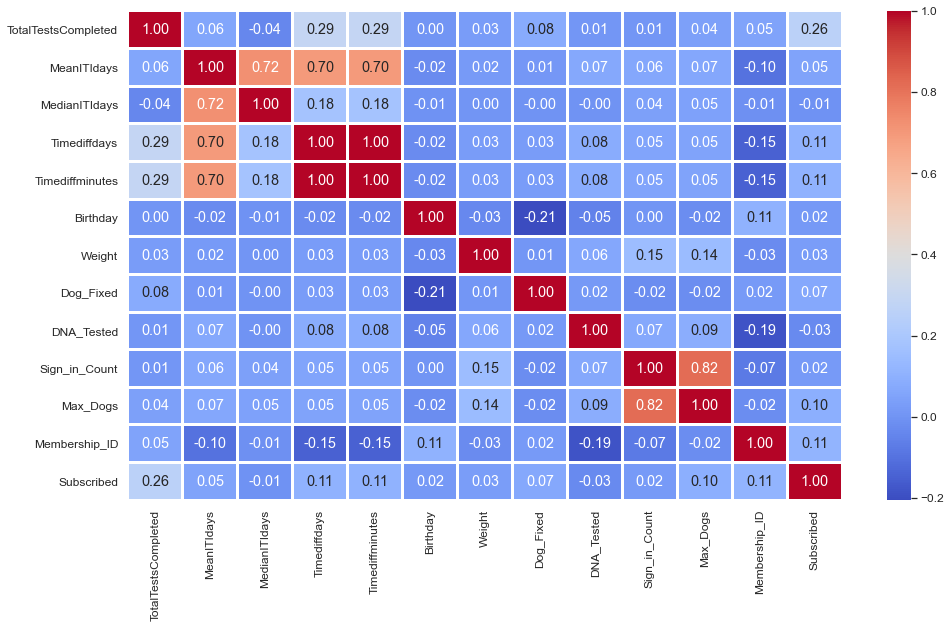

In [36]:
plt.figure(figsize=(16,9))
sns.heatmap(dogsub19.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

In the Dognition_aggregated_by_DogID data set, when looking at only dogs who completed 7 or less tests, which of the following is true about the relationship between inter-test intervals (ITIs) and number of tests completed?  Click all that apply

In [37]:
dogsub7 = df[df["TotalTestsCompleted"] <= 7]

In [38]:
dogsub7

,DogID,TotalTestsCompleted,MeanITIdays,MeanITIminutes,MedianITIdays,MedianITIminutes,Timediffdays,Timediffminutes,UserID,Gender,Birthday,Breed,Breed_Type,Breed_Group,Weight,Dog_Fixed,DNA_Tested,Dimension,Sign_in_Count,Max_Dogs,Membership_ID,Subscribed,City,State,Zip,Country,Exclude,Free_Start_User,Last_Active_At,Membership_Type
2,fd27b6b4-7144-11e5-ba71-058fbc01cf0b,2,0.009132,13.15000009,0.009132,13.15000009,0.009132,13.150000,ce135ab8-7144-11e5-ba71-058fbc01cf0b,male,2012.0,Golden Retriever,Pure Breed,Sporting,70.0,0.0,1.0,0,3.0,1.0,1.0,1.0,Darien,CT,6820,US,0,0,01/00/1900 12:00:00 AM,1
17,fd27ce1a-7144-11e5-ba71-058fbc01cf0b,7,0.002816,4.055555575,0.002946,4.241666624,0.016898,24.333333,ce136f94-7144-11e5-ba71-058fbc01cf0b,male,2000.0,Beagle,Pure Breed,Hound,20.0,1.0,1.0,0,27.0,4.0,2.0,1.0,Charlottesville,VA,22903,US,0,0,04/13/2014 01:46:00 PM,2
18,fd27cea6-7144-11e5-ba71-058fbc01cf0b,2,0.002535,3.649999984,0.002535,3.649999984,0.002535,3.650000,ce1373ae-7144-11e5-ba71-058fbc01cf0b,male,2000.0,Mixed,Mixed Breed/ Other/ I Don't Know,0,10.0,1.0,0.0,0,2.0,1.0,1.0,0.0,Los Angeles,CA,90046,US,0,0,01/00/1900 12:00:00 AM,1
20,fd27cfaa-7144-11e5-ba71-058fbc01cf0b,7,2.336809,3365.005556,0.003090,4.449999919,14.020856,20190.033330,ce1375b6-7144-11e5-ba71-058fbc01cf0b,male,2006.0,Border Collie,Pure Breed,Herding,40.0,1.0,0.0,0,3.0,1.0,1.0,1.0,Grayslake,IL,60030,US,0,0,01/00/1900 12:00:00 AM,1
23,fd27d144-7144-11e5-ba71-058fbc01cf0b,7,24.510177,35294.65556,0.003709,5.341666693,147.061065,211767.933300,ce137868-7144-11e5-ba71-058fbc01cf0b,male,2004.0,Poodle,Pure Breed,Non-Sporting,50.0,1.0,1.0,0,5.0,2.0,2.0,1.0,Dixon,CA,95620,US,0,0,09/20/2014 05:08:00 PM,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17979,fdc22820-7144-11e5-ba71-058fbc01cf0b,2,0.002199,3.16666676,0.002199,3.16666676,0.002199,3.166667,ce9b1ab6-7144-11e5-ba71-058fbc01cf0b,male,2005.0,Chihuahua,Pure Breed,Toy,0.0,1.0,0.0,0,1.0,1.0,10.0,1.0,Alamo,CA,94507,US,0,0,10/11/2015 22:51,1
17981,fdc235e0-7144-11e5-ba71-058fbc01cf0b,7,0.009408,13.54722222,0.004786,6.891666669,0.056447,81.283333,ce9b2aba-7144-11e5-ba71-058fbc01cf0b,male,2012.0,Chihuahua-Jack Russell Terrier Mix,Cross Breed,0,10.0,1.0,0.0,0,1.0,1.0,10.0,0.0,NaN,NaN,NaN,NaN,0,0,10/12/2015 14:44,1
17982,fdc23a68-7144-11e5-ba71-058fbc01cf0b,1,NaN,#VALUE!,NaN,#VALUE!,0.000000,0.000000,ce9b2eb6-7144-11e5-ba71-058fbc01cf0b,male,2014.0,Shetland Sheepdog,Pure Breed,Herding,10.0,0.0,0.0,0,1.0,1.0,9.0,0.0,NaN,NaN,NaN,NaN,0,1,10/12/2015 20:43,4
17984,fdc23e96-7144-11e5-ba71-058fbc01cf0b,4,0.002948,4.244444444,0.002778,4.000000102,0.008843,12.733333,ce9b33b6-7144-11e5-ba71-058fbc01cf0b,female,2011.0,Yorkshire Terrier,Pure Breed,Toy,0.0,1.0,0.0,0,1.0,1.0,9.0,0.0,NaN,NaN,NaN,NaN,0,1,10/12/2015 19:17,4


In [39]:
dogsub7.corr()

,TotalTestsCompleted,MeanITIdays,MedianITIdays,Timediffdays,Timediffminutes,Birthday,Weight,Dog_Fixed,DNA_Tested,Sign_in_Count,Max_Dogs,Membership_ID,Subscribed
TotalTestsCompleted,1.000000,0.025780,-0.051156,0.135254,0.135254,-0.031222,0.012351,0.051099,0.033668,-0.014794,0.028311,0.080952,0.118786
MeanITIdays,0.025780,1.000000,0.770135,0.827444,0.827444,-0.021512,0.021913,0.012782,0.060938,0.058255,0.061508,-0.069562,0.046628
MedianITIdays,-0.051156,0.770135,1.000000,0.333051,0.333051,-0.007653,0.006565,0.000075,-0.000453,0.048310,0.056605,-0.011271,-0.001748
Timediffdays,0.135254,0.827444,0.333051,1.000000,1.000000,-0.027442,0.026089,0.022484,0.077109,0.050517,0.050003,-0.096002,0.082177
Timediffminutes,0.135254,0.827444,0.333051,1.000000,1.000000,-0.027442,0.026089,0.022484,0.077109,0.050517,0.050003,-0.096002,0.082177
Birthday,-0.031222,-0.021512,-0.007653,-0.027442,-0.027442,1.000000,-0.038463,-0.203620,-0.053094,0.000391,-0.013795,0.101327,0.009241
Weight,0.012351,0.021913,0.006565,0.026089,0.026089,-0.038463,1.000000,0.016732,0.056323,0.161843,0.145965,-0.034486,0.024531
Dog_Fixed,0.051099,0.012782,0.000075,0.022484,0.022484,-0.203620,0.016732,1.000000,0.026089,-0.029565,-0.028372,0.010443,0.074566
DNA_Tested,0.033668,0.060938,-0.000453,0.077109,0.077109,-0.053094,0.056323,0.026089,1.000000,0.048958,0.062918,-0.152902,-0.032499
Sign_in_Count,-0.014794,0.058255,0.048310,0.050517,0.050517,0.000391,0.161843,-0.029565,0.048958,1.000000,0.831039,-0.074622,0.022814


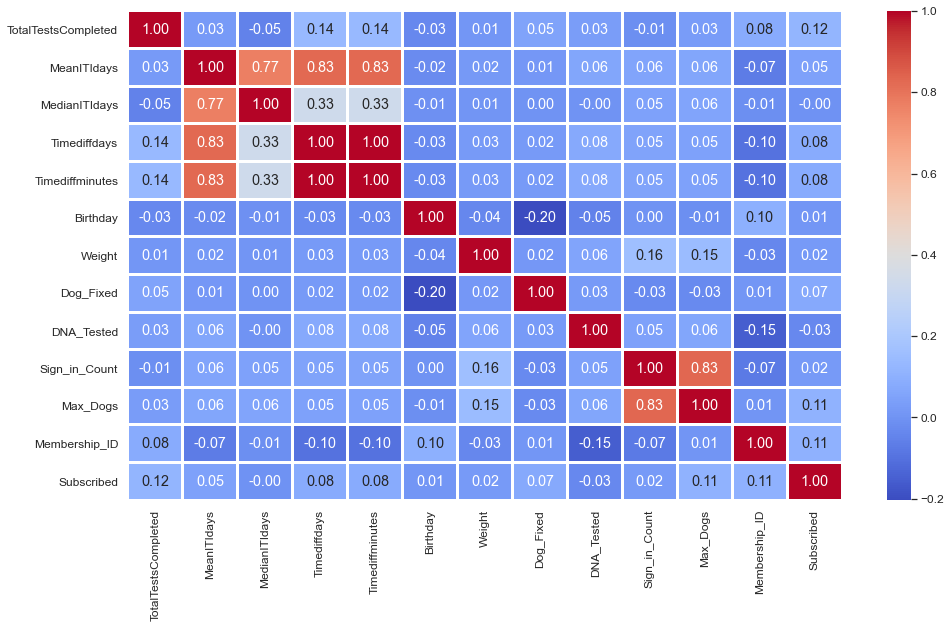

In [40]:
plt.figure(figsize=(16,9))
sns.heatmap(dogsub7.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

#### Python code done by Dennis Lam